# **Analiza statystyczna zbioru danych dot. ślimaków zwanych słuchotkami (lub uchowcami)**

**Importowanie pakietu pandas, numpy i matplotlib oraz wyświetlenie ich wersji**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

print('\nWersja pakietu pandas: ', pd.__version__)
print('Wersja pakietu numpy: ', np.__version__)
print('Wersja pakietu matplotlib: ', matplotlib.__version__)



Wersja pakietu pandas:  1.1.4
Wersja pakietu numpy:  1.21.3
Wersja pakietu matplotlib:  3.3.3


**Importowanie danych z pliku csv oraz nadanie nazw kolumnom**

In [2]:
col_names = ['sex', 'length', 'diameter',
            'height', 'whole weight', 'shucked weight',
            'viscera weight', 'shell weight', 'rings']

data = pd.read_csv('data.csv', names = col_names)

*Wymagania na ocenę dostateczną:*

1. Tabela dla cechy jakościowej

In [3]:
count = data['sex'].value_counts()
percentage = []

for i in range (len(count)):
    percentage.append((count[i] / data['sex'].count())*100)

percentage = pd.Series(percentage, index = ['M', 'I', 'F'])

output_qualitative = pd.concat([count, percentage], axis = 1)
output_qualitative.columns = ['count', 'percentage']

display(output_qualitative)

,count,percentage
M,1528,36.581278
I,1342,32.128322
F,1307,31.290400


2. Tabela dla cech ilościowych

In [4]:
length = data['length']

mean_values = data.loc[:, data.columns != 'sex'].mean()
std_values = data.loc[:, data.columns != 'sex'].std()
min_values = data.loc[:, data.columns != 'sex'].min()
first_quartile = data.loc[:, data.columns != 'sex'].quantile(0.25)
median = data.loc[:, data.columns != 'sex'].quantile(0.5)
third_quartile = data.loc[:, data.columns != 'sex'].quantile(0.75)
max_values = data.loc[:, data.columns != 'sex'].max()


output_quantitative = pd.concat([mean_values, std_values, min_values, first_quartile,
                                 median, third_quartile, max_values], axis = 1)

output_quantitative.columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

display(output_quantitative)

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Wykres słupkowy liczebności poszczególnych wariantów cechy jakościowej

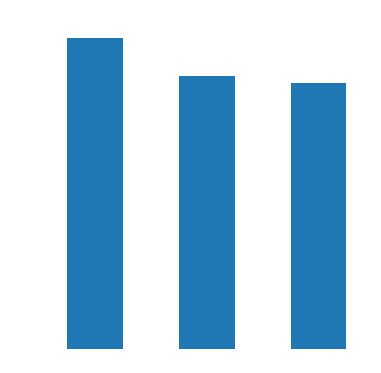

In [5]:
params = {'ytick.color' : 'w',
          "xtick.color" : 'w',
          'axes.labelcolor' : 'w',
          'axes.edgecolor' : 'w',
          'figure.figsize' : [6, 6],
          'text.color': 'w'
          }

plt.rcParams.update(params)

plot_qualitative = data['sex'].value_counts().plot.bar(rot = 0, title = 'sex')


4. Histogramy cech ilościowych

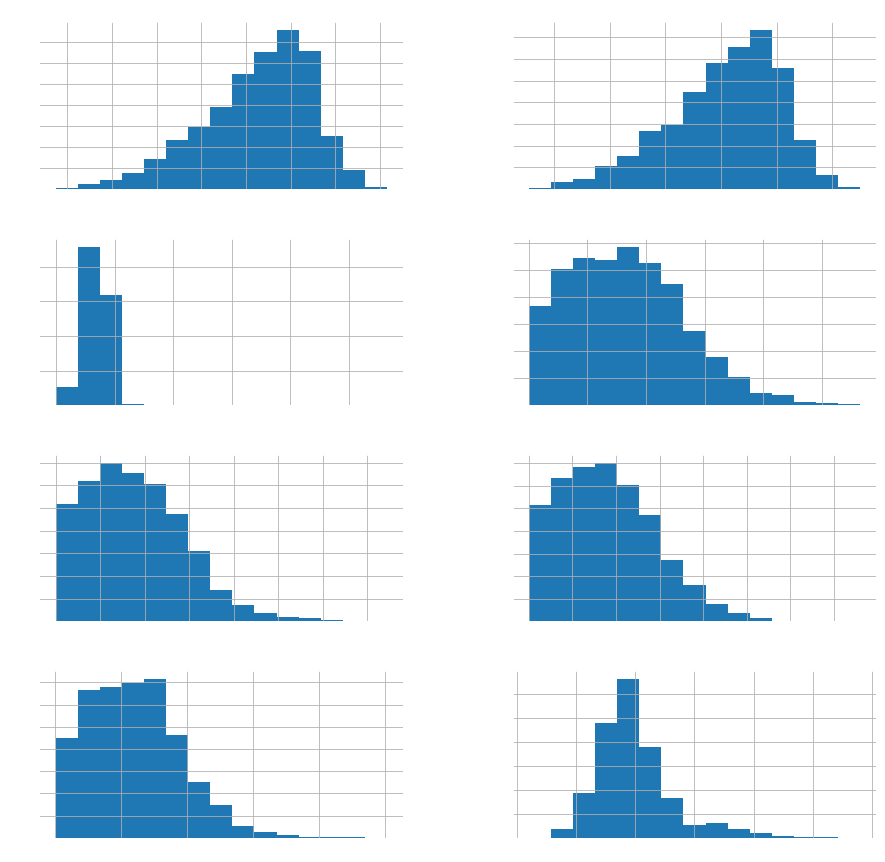

In [6]:
plt.rcParams['figure.figsize'] = 15, 15

histogram_quantitative = data.hist(layout = [4, 2], bins = 15)